In [8]:
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd  
import numpy as np

In [149]:
page_url='https://www.espn.in/nba/matchup?gameId=401070729'

uClient= uReq(page_url)
page_soup=soup(uClient.read(),'html.parser')
uClient.close()

In [160]:
def getHeadings():
    stat_headings=[]
    score_headings=[]

    for li in data:
        stat_headings.append('A_'+li[0])
        stat_headings.append('H_'+li[0])
    score_headings.append('A_Team')
    score_headings.append('H_Team')
    for i in range(1,5):
        score_headings.append('A_Q'+str(i))
        score_headings.append('H_Q'+str(i))
    for i in range(1,7):
        score_headings.append('A_OT'+str(i))
        score_headings.append('H_OT'+str(i))
    score_headings.append('A_Final')
    score_headings.append('H_Final')
    return score_headings+stat_headings

In [170]:
def getStats(page_soup):
    try:
        data=[]
        stat_data=[]
        containers=page_soup.findAll('table',{'class':'mod-data'})
        stat_table=containers[0]
        rows=stat_table.tbody.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append([ele for ele in cols if ele])
        for li in data:
            stat_data.append(li[1])
            stat_data.append(li[2])
    except:
        return None
    else:
        return stat_data
    

In [171]:
def getQuarterly(page_soup):
    try:
        quarter_data=[]
        score_data=[]
        score_board=page_soup.findAll('table',{'class':'miniTable'})
        rows_sb=score_board[0].tbody.find_all('tr')
        for rows_sb in rows_sb:
            cols = rows_sb.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            quarter_data.append([ele for ele in cols if ele])

        for i in range(0,len(quarter_data[0])-1):
            score_data.append(quarter_data[0][i])
            score_data.append(quarter_data[1][i])
        for i in range(0,len(score_headings)-2-len(score_data)):
            score_data.append(0)
        score_data.append(quarter_data[0][len(quarter_data[0])-1])
        score_data.append(quarter_data[1][len(quarter_data[1])-1])
    except:
        return None
    else:
        return score_data

In [155]:
len(getQuarterly()+getStats())

64

In [165]:
headings=getHeadings()

In [181]:
backup_list=[]
backup_id=0

In [182]:
first_game=401070213
last_game=401071903
count=0
complete_list=[]
for i in range(first_game,last_game+1):
    page_id=i
    page_url='https://www.espn.in/nba/matchup?gameId='+str(page_id)
    try:
        uClient= uReq(page_url)
        page_soup=soup(uClient.read(),'html.parser')
        uClient.close()
        current_data=getQuarterly(page_soup)+getStats(page_soup)
    except:
        print("Error in page_id: "+str(page_id))
        continue
    else:    
        complete_list.append(current_data)
        count=count+1
        if(count%100==0):
            backup_list=complete_list
            backup_id=page_id

Error in page_id: 401070224
Error in page_id: 401070225
Error in page_id: 401070226
Error in page_id: 401070227
Error in page_id: 401070228
Error in page_id: 401070229
Error in page_id: 401070230
Error in page_id: 401070231
Error in page_id: 401070232
Error in page_id: 401070241
Error in page_id: 401070242
Error in page_id: 401070243
Error in page_id: 401070244
Error in page_id: 401070245
Error in page_id: 401070246
Error in page_id: 401070247
Error in page_id: 401070248
Error in page_id: 401070249
Error in page_id: 401070250
Error in page_id: 401070251
Error in page_id: 401070252
Error in page_id: 401070253
Error in page_id: 401070254
Error in page_id: 401070255
Error in page_id: 401070256
Error in page_id: 401070257
Error in page_id: 401070258
Error in page_id: 401070259
Error in page_id: 401070260
Error in page_id: 401070261
Error in page_id: 401070262
Error in page_id: 401070263
Error in page_id: 401070264
Error in page_id: 401070265
Error in page_id: 401070266
Error in page_id: 40

Error in page_id: 401070525
Error in page_id: 401070526
Error in page_id: 401070527
Error in page_id: 401070528
Error in page_id: 401070529
Error in page_id: 401070530
Error in page_id: 401070531
Error in page_id: 401070532
Error in page_id: 401070533
Error in page_id: 401070534
Error in page_id: 401070535
Error in page_id: 401070536
Error in page_id: 401070537
Error in page_id: 401070538
Error in page_id: 401070539
Error in page_id: 401070540
Error in page_id: 401070541
Error in page_id: 401070542
Error in page_id: 401070543
Error in page_id: 401070544
Error in page_id: 401070545
Error in page_id: 401070546
Error in page_id: 401070547
Error in page_id: 401070548
Error in page_id: 401070549
Error in page_id: 401070550
Error in page_id: 401070551
Error in page_id: 401070552
Error in page_id: 401070553
Error in page_id: 401070554
Error in page_id: 401070555
Error in page_id: 401070556
Error in page_id: 401070557
Error in page_id: 401070558
Error in page_id: 401070559
Error in page_id: 40

In [183]:
df = pd.DataFrame(complete_list, columns =headings, dtype = float) 
df 

,A_Team,H_Team,A_Q1,H_Q1,A_Q2,H_Q2,A_Q3,H_Q3,A_Q4,H_Q4,...,A_Points in Paint,H_Points in Paint,A_Fouls,H_Fouls,A_Technical Fouls,H_Technical Fouls,A_Flagrant Fouls,H_Flagrant Fouls,A_Largest Lead,H_Largest Lead
0,PHI,BOS,21.0,21.0,21.0,26.0,24.0,30.0,21.0,28.0,...,50.0,34.0,20.0,20.0,0.0,0.0,0.0,0.0,4.0,18.0
1,OKC,GS,23.0,31.0,24.0,26.0,32.0,26.0,21.0,25.0,...,34.0,58.0,21.0,29.0,0.0,0.0,0.0,0.0,3.0,14.0
2,NO,HOU,35.0,29.0,36.0,25.0,30.0,30.0,30.0,28.0,...,76.0,44.0,25.0,22.0,0.0,1.0,0.0,0.0,29.0,0.0
3,DAL,PHX,24.0,37.0,22.0,19.0,27.0,27.0,27.0,38.0,...,54.0,36.0,16.0,22.0,0.0,0.0,0.0,0.0,2.0,21.0
4,CHI,PHI,41.0,38.0,17.0,27.0,18.0,37.0,32.0,25.0,...,46.0,46.0,23.0,17.0,0.0,1.0,0.0,0.0,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,OKC,MIL,29.0,31.0,39.0,27.0,30.0,31.0,29.0,27.0,...,46.0,46.0,20.0,14.0,0.0,0.0,0.0,0.0,20.0,8.0
1225,DAL,SA,16.0,30.0,21.0,27.0,28.0,23.0,29.0,25.0,...,36.0,46.0,19.0,14.0,0.0,0.0,0.0,0.0,1.0,22.0
1226,MIN,DEN,21.0,22.0,29.0,29.0,29.0,22.0,16.0,26.0,...,38.0,44.0,22.0,12.0,0.0,1.0,0.0,0.0,11.0,7.0
1227,UTAH,LAC,26.0,39.0,40.0,31.0,31.0,32.0,29.0,24.0,...,52.0,76.0,24.0,27.0,0.0,0.0,0.0,0.0,3.0,17.0


In [184]:
df.to_csv('scrapped_nba_games_data.csv', index=False)

In [2]:
finaldf=pd.read_csv('scrapped_nba_games_data.csv')

In [5]:
df=finaldf

In [9]:
#dropping columns with data as 0
cols_to_drop=[]
for col in df.columns:
    if (df[col].dtypes==np.dtype('float64') and df[col].mean()==0):
        cols_to_drop.append(col)
df.drop(columns=cols_to_drop)

,A_Team,H_Team,A_Q1,H_Q1,A_Q2,H_Q2,A_Q3,H_Q3,A_Q4,H_Q4,...,A_Points in Paint,H_Points in Paint,A_Fouls,H_Fouls,A_Technical Fouls,H_Technical Fouls,A_Flagrant Fouls,H_Flagrant Fouls,A_Largest Lead,H_Largest Lead
0,PHI,BOS,21.0,21.0,21.0,26.0,24.0,30.0,21.0,28.0,...,50.0,34.0,20.0,20.0,0.0,0.0,0.0,0.0,4.0,18.0
1,OKC,GS,23.0,31.0,24.0,26.0,32.0,26.0,21.0,25.0,...,34.0,58.0,21.0,29.0,0.0,0.0,0.0,0.0,3.0,14.0
2,NO,HOU,35.0,29.0,36.0,25.0,30.0,30.0,30.0,28.0,...,76.0,44.0,25.0,22.0,0.0,1.0,0.0,0.0,29.0,0.0
3,DAL,PHX,24.0,37.0,22.0,19.0,27.0,27.0,27.0,38.0,...,54.0,36.0,16.0,22.0,0.0,0.0,0.0,0.0,2.0,21.0
4,CHI,PHI,41.0,38.0,17.0,27.0,18.0,37.0,32.0,25.0,...,46.0,46.0,23.0,17.0,0.0,1.0,0.0,0.0,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,OKC,MIL,29.0,31.0,39.0,27.0,30.0,31.0,29.0,27.0,...,46.0,46.0,20.0,14.0,0.0,0.0,0.0,0.0,20.0,8.0
1225,DAL,SA,16.0,30.0,21.0,27.0,28.0,23.0,29.0,25.0,...,36.0,46.0,19.0,14.0,0.0,0.0,0.0,0.0,1.0,22.0
1226,MIN,DEN,21.0,22.0,29.0,29.0,29.0,22.0,16.0,26.0,...,38.0,44.0,22.0,12.0,0.0,1.0,0.0,0.0,11.0,7.0
1227,UTAH,LAC,26.0,39.0,40.0,31.0,31.0,32.0,29.0,24.0,...,52.0,76.0,24.0,27.0,0.0,0.0,0.0,0.0,3.0,17.0


In [10]:
#adding a column for the winner
df['Winner'] = df.apply (lambda row: row['A_Team'] if(row['A_Final']>row['H_Final']) else row['H_Team'], axis=1)

In [11]:
#standings
standing=df['Winner'].value_counts()
standing

MIL     60
TOR     58
GS      57
DEN     54
POR     53
HOU     53
PHI     51
UTAH    50
OKC     49
BOS     49
SA      48
IND     48
LAC     47
ORL     42
BKN     42
DET     41
CHA     39
MIA     39
SAC     39
LAL     37
MIN     36
NO      33
DAL     33
MEM     33
WSH     32
ATL     29
CHI     22
CLE     19
PHX     19
NY      17
Name: Winner, dtype: int64

In [12]:
#Teams with the most wins with home team advantage
df[df['Winner']==df['H_Team']]['Winner'].value_counts()

DEN     34
MIL     33
POR     32
TOR     32
SA      32
HOU     31
PHI     31
GS      30
UTAH    29
IND     29
BOS     28
OKC     27
DET     26
ORL     25
LAC     25
CHA     25
MIN     25
SAC     24
DAL     24
BKN     23
WSH     22
LAL     22
MEM     21
MIA     19
NO      19
ATL     17
CLE     13
PHX     12
CHI      9
NY       9
Name: Winner, dtype: int64

In [13]:
comebacks=df.copy()
comebacks=comebacks[( comebacks['A_Largest Lead']>comebacks['H_Largest Lead']) & (comebacks['Winner']==comebacks['H_Team']) 
             |(comebacks['A_Largest Lead']<comebacks['H_Largest Lead']) & (comebacks['Winner']==comebacks['A_Team'])]
comebacks['Lead_OverCome']=comebacks.apply (lambda row: row['A_Largest Lead'] if(row['A_Largest Lead']>row['H_Largest Lead']) else row['H_Largest Lead'], axis=1)
comebacks=comebacks.sort_values(by='Lead_OverCome',ascending=False)
comebacks=comebacks[['Winner','Lead_OverCome']]
print(comebacks.to_string(index=False))

Winner  Lead_OverCome
   POR           28.0
   BKN           28.0
   LAC           28.0
   OKC           26.0
   ATL           26.0
   LAC           25.0
   DEN           25.0
   WSH           24.0
   ATL           23.0
   OKC           23.0
   MIL           23.0
   BOS           22.0
   DET           22.0
   DET           21.0
    NY           21.0
   CHI           21.0
   BKN           21.0
  UTAH           21.0
   PHX           21.0
   BOS           21.0
   HOU           21.0
   HOU           21.0
   LAC           20.0
   PHI           20.0
   IND           20.0
   HOU           20.0
   LAL           20.0
   MIA           19.0
   MIN           19.0
   OKC           19.0
   IND           19.0
   LAC           19.0
    GS           19.0
   WSH           19.0
   LAL           19.0
   BOS           19.0
    SA           19.0
   MIN           19.0
   SAC           19.0
    NO           19.0
   SAC           19.0
    NO           19.0
   DET           19.0
   MEM           18.0
   CHA    

In [16]:
#For plotting
import matplotlib.pyplot as plt

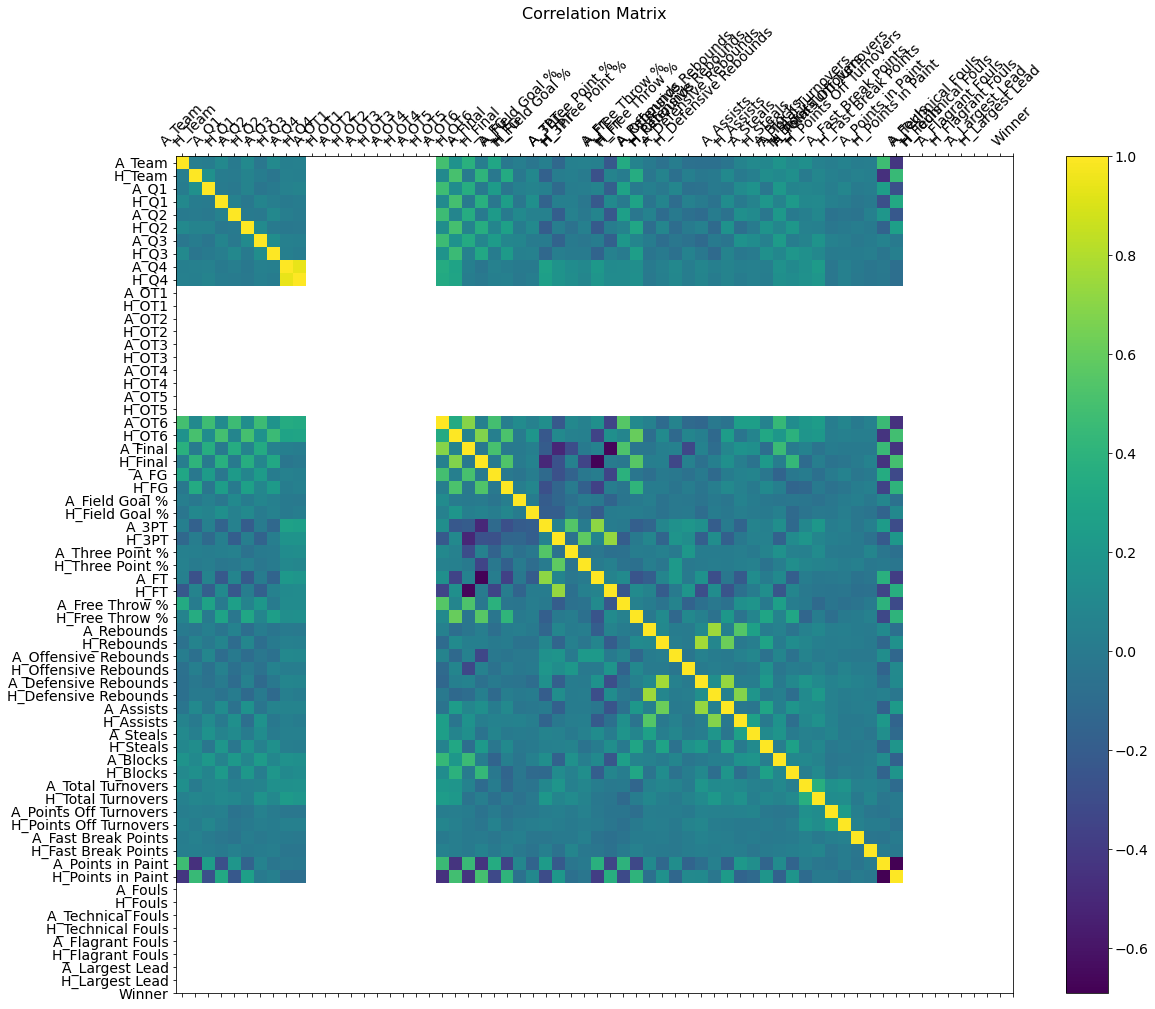

In [17]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);